# Árbol de decision para especies de flores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conda install sklearn.ensemble

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn.ensemble

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

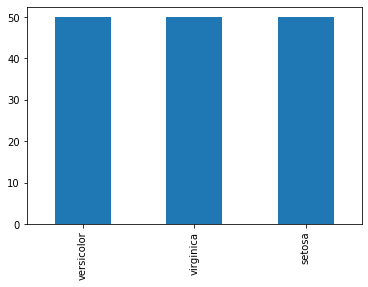

In [5]:
plt.hist(data.Species.astype(np.str))# Como no me deja hacer el histograma así lo hacemos con pandas
pd.Series(data.Species).value_counts().plot('bar')#Este es el histograma creado con pandas

In [6]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [8]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

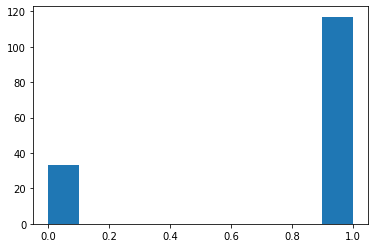

In [9]:
plt.hist(data.is_train.astype(np.float32)) #EL histograma lo hemos pasado a float por que me daba error si no

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,5,1
virginica,0,1,16


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("C:/Users/Megaport/Desktop/python/datos machine learning/iris/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os# se utiliza para abrir los textos en .doc
os.environ["PATH"] += os.pathsep + 'C:/Users/Megaport/Desktop/python/datos machine learning/iris/release/bin'
from graphviz import Source

In [18]:
file = open("C:/Users/Megaport/Desktop/python/datos machine learning/iris/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.575\\nsamples = 117\\nvalue = [40, 44, 33]"] ;\n1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.985\\nsamples = 77\\nvalue = [0, 44, 33]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.348\\nsamples = 46\\nvalue = [0, 43, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.156\\nsamples = 44\\nvalue = [0, 43, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 42\\nvalue = [0, 42, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.206\\nsamples = 31\\nvalue = [0, 1, 30]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8

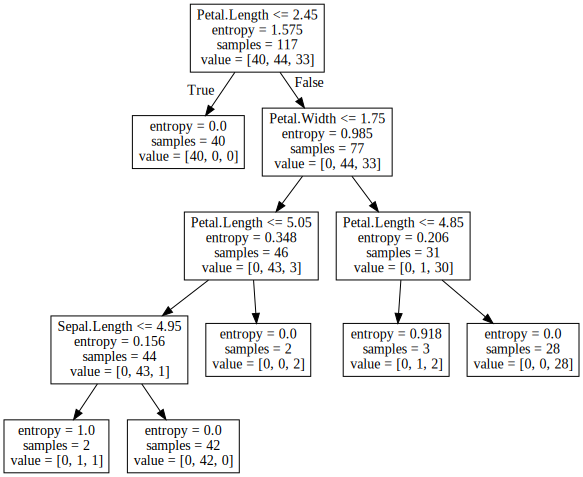

In [19]:
Source(text)

## Cross de variación

In [20]:
X = data[predictors]
Y = data[target]

In [21]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [22]:
from sklearn.model_selection import KFold

In [23]:
cv = KFold(n_splits= 10, shuffle=True, random_state=1)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))

In [26]:
score

0.9333333333333333

In [27]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Socre para i = ",i," es de ", score)
    print("   ", tree.feature_importances_)#Aquí sacamos que datos utiliza para clasificar

Socre para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Socre para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Socre para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Socre para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Socre para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [28]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [29]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n_splits= 20, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Socre para i = ",i," es de ", score)
    print("   ", tree.feature_importances_)#Aquí sacamos que datos utiliza para clasificar

Socre para i =  1  es de  0.5258928571428572
    [0. 0. 1. 0.]
Socre para i =  2  es de  0.9303571428571429
    [0.         0.         0.66620285 0.33379715]
Socre para i =  3  es de  0.925
    [0.         0.         0.68976981 0.31023019]
Socre para i =  4  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  5  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  6  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  7  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  8  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  9  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]
Socre para i =  10  es de  0.9178571428571429
    [0.         0.         0.66869158 0.33130842]


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification

In [34]:
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(Y)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
print(forest.oob_decision_function_)

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_decision_function_'